   1)  Age: displays the age of the individual.
    
   2)  Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female
    
   3) Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
    
   4) Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
    
    5) Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
    
   6) Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    
    If fasting blood sugar > 120mg/dl then : 1 (true)
    else : 0 (false)
    
   7) Resting ECG : displays resting electrocardiographic results
    0 = normal
    1 = having ST-T wave abnormality
    2 = left ventricular hyperthrophy
    
   8) Max heart rate achieved : displays the max heart rate achieved by an individual.
    
        
   9) Exercise induced angina :
    1 = yes
    0 = no
   
   10) ST depression induced by exercise relative to rest: displays the value which is an integer or float.
   
   11) Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
   
    12)Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
   
   13) Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


!pip install pandas-profiling 

import pandas_profiling 
profile = data.profile_report(title="Heart Dataset") 
profile.to_file(output_file=("./heart_report.html"))

In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Class 0: 138
Class 1: 165
Proportion: 0.84 : 1


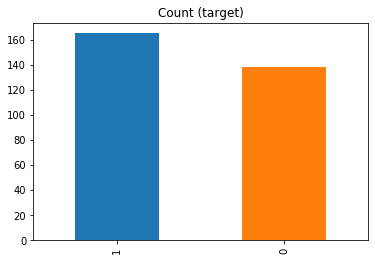

In [7]:
#Verificando as classes para ver se não estão desbalanceadas
target_count = data.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

In [8]:
corr = data.corr()

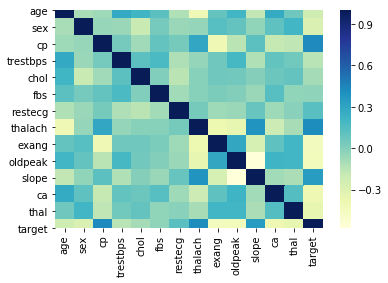

In [9]:
ax = sns.heatmap(corr, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (30,30)
plt.show()

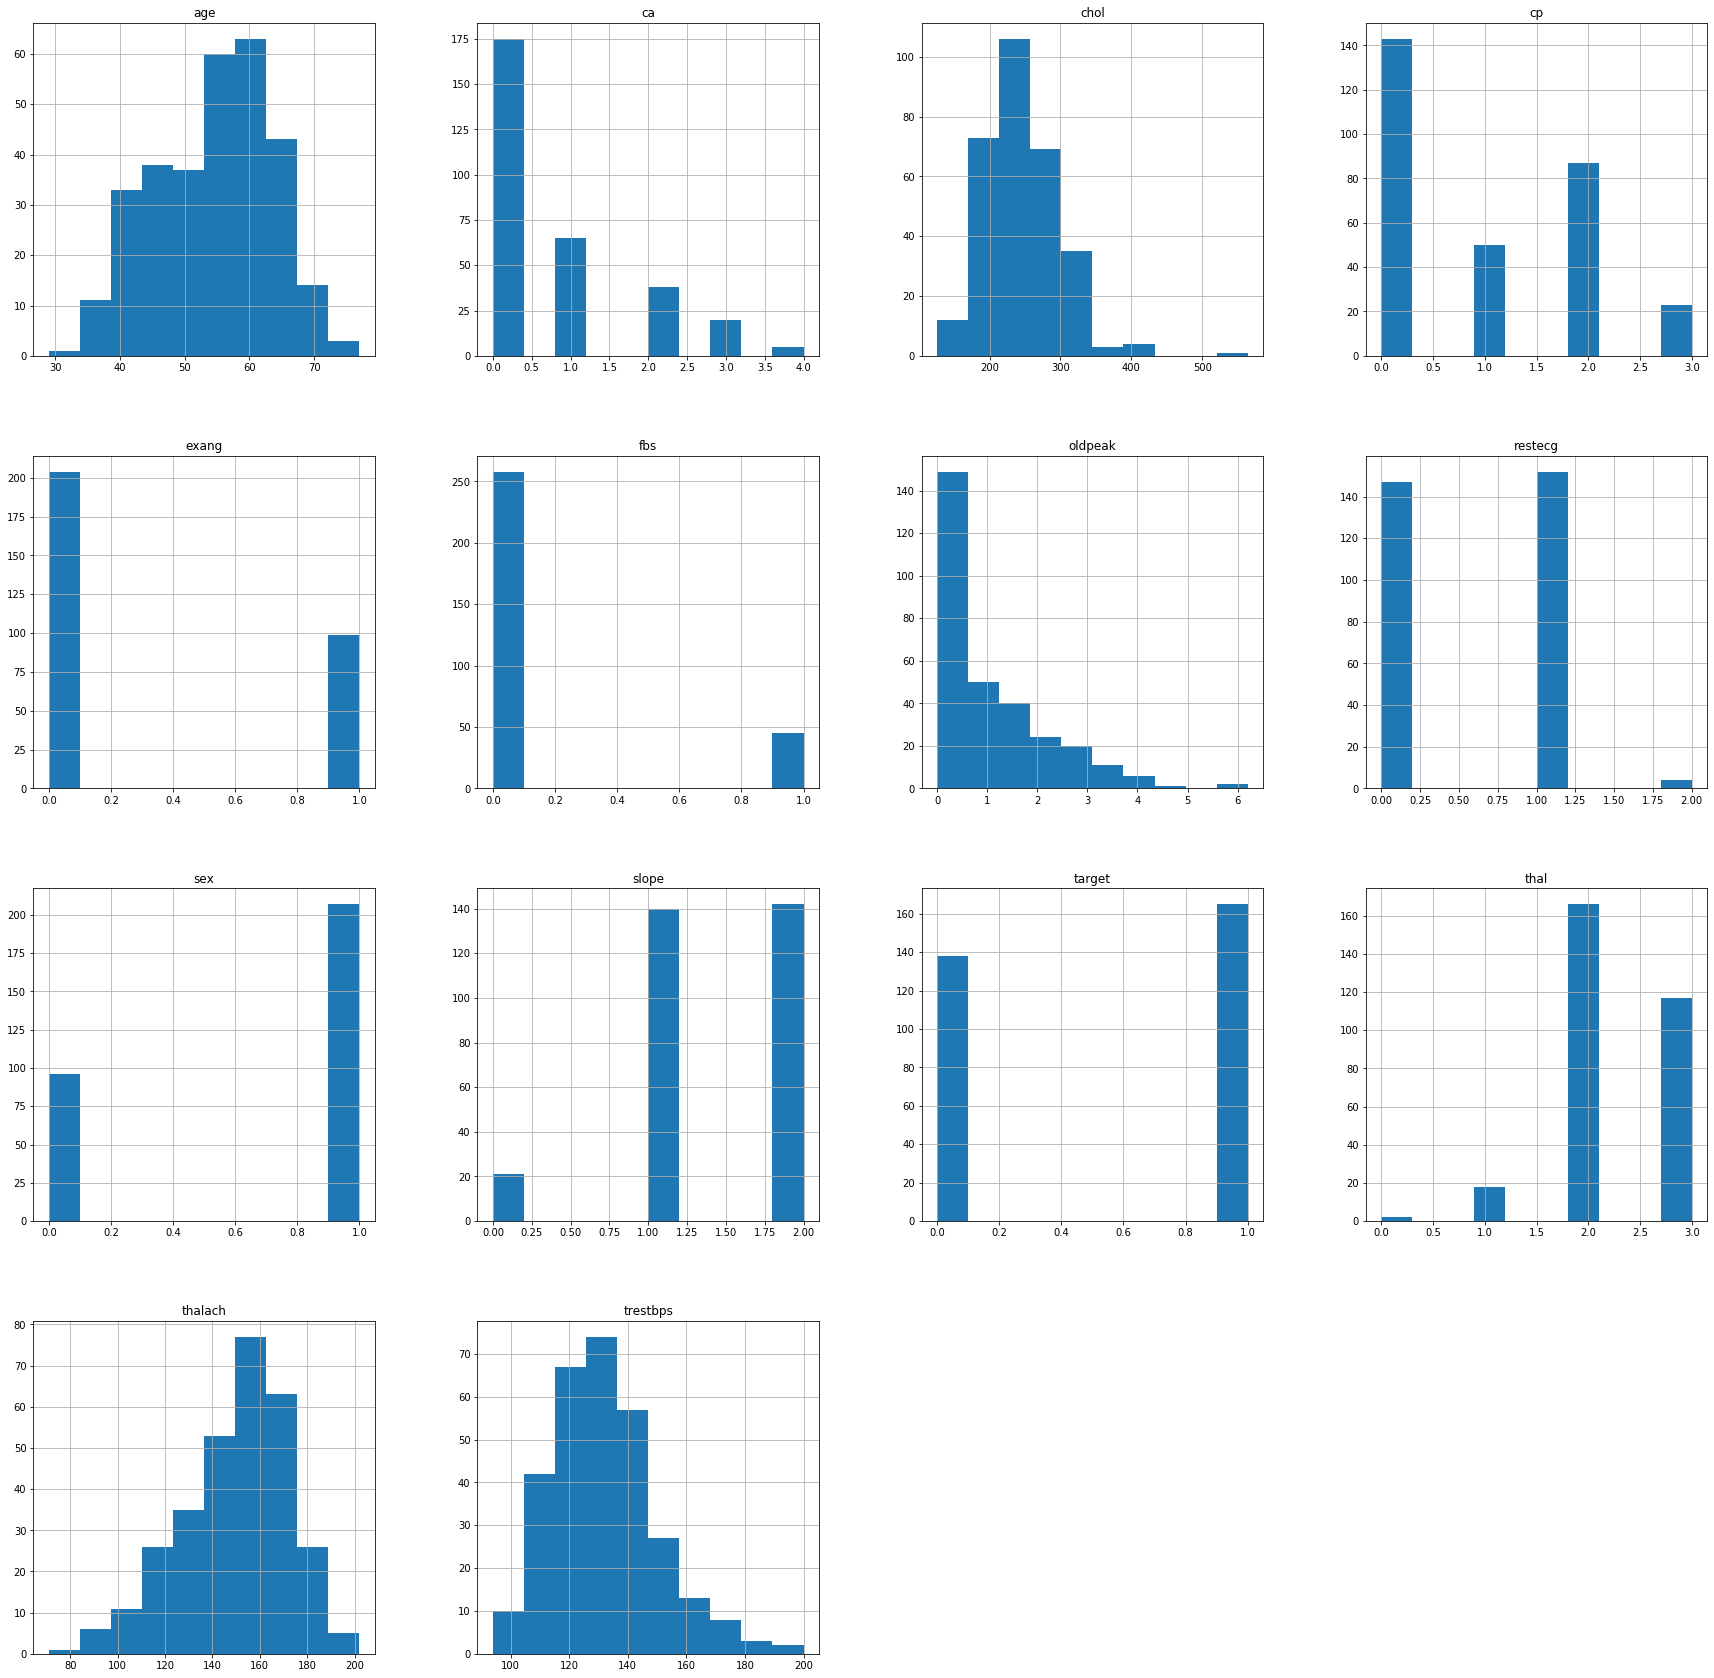

In [10]:
data.hist()
plt.show()

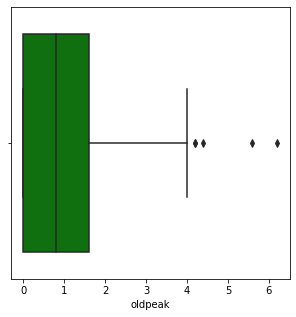

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(data.oldpeak, color = 'green')


In [12]:
data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [13]:
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [14]:
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [15]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
data['thal'].unique()

array([1, 2, 3, 0])

In [17]:
X = data.iloc[:,:13]
Y = data.iloc[:,13]

In [18]:
def out(n):
    mean = np.mean(n, axis=0)
    sd = np.std(n, axis=0)

    for x in n:
        if (x < mean - 2*sd):
             print(x)

In [19]:
out(data['chol'])

141
126
131


In [20]:
out(data['ca'])

In [21]:
out(data['oldpeak'])

In [22]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [23]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [24]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [26]:
y_train.shape,y_test.shape

((242,), (61,))

In [27]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import  GridSearchCV

In [28]:
models = {
    "SVC": svm.SVC(kernel="linear"),
    #"MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier()
}
prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(X_train,y_train)
    prediction[model_name] = model.predict(X_test)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score
    print("{}{}{}".format(model_name, ": ", score))


SVC: 0.8688524590163934
LogisticRegression: 0.8524590163934426
KNeighborsClassifier: 0.9180327868852459
DecisionTreeClassifier: 0.8524590163934426
RandomForestClassifier: 0.8360655737704918
AdaBoostClassifier: 0.8032786885245902
BaggingClassifier: 0.8032786885245902
ExtraTreesClassifier: 0.8360655737704918
XGBoost: 0.8524590163934426


/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

In [30]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)


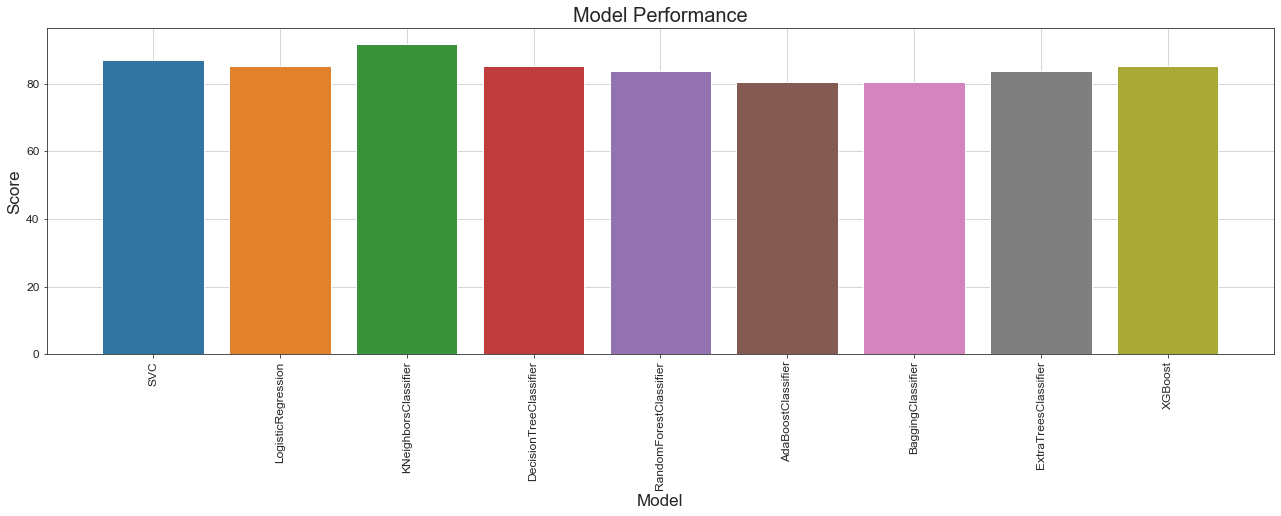

                    model      score
0                     SVC  86.885246
1      LogisticRegression  85.245902
2    KNeighborsClassifier  91.803279
3  DecisionTreeClassifier  85.245902
4  RandomForestClassifier  83.606557
5      AdaBoostClassifier  80.327869
6       BaggingClassifier  80.327869
7    ExtraTreesClassifier  83.606557
8                 XGBoost  85.245902


In [31]:
plot_model_performace(result)
